# python 第13周作业
    ·计算所有年份冬季（12、1、2月）平均；
    ·对中东太平洋海温进行EOF分解，画出第一模态；
    ·对印度洋海温进行EOF分解，画出第一模态；
    ·计算两个第一模态时间系数与我国气温的协方差、相关系数；
    ·分别用印度洋海温和中东太平洋海温与我国气温进行SVD分析；
    ·利用两个第一模态的时间系数回归中国夏季气温![image.png](attachment:image.png)

In [1]:
import numpy as np    # 计算用
import xarray as xr    # 计算用
import matplotlib.pyplot as plt    # 画图用
from matplotlib.ticker import MultipleLocator    # 定位坐标
from matplotlib.path import Path    ### 白化关键包
import cartopy.crs as ccrs    # 画图用
from cartopy.io.shapereader import Reader
from cartopy.mpl.patch import geos_to_path
import geopandas as gpd    # 读取地图数据
from eofs.standard import Eof
from xMCA import xMCA

In [2]:
# ENSO指数,中东太平洋，计算5S~5N,170E-120W
# 印度洋全区一致模态, 20S~20N， 40-110E
# 拟定中国地理经纬度范围25-45N， 80-125E

In [3]:
# shp = gpd.read_file(r'D:\work\python\tests\100000\100000.shp')
shp = gpd.read_file(r'E:\Work\Python\usedata\horizion\100000\100000.shp')
shp

,adcode,name,center,centroid,childrenNu,level,parent,geometry
0,100000,ä¸­åäººæ°å ±åå½,None,None,34,country,None,"MULTIPOLYGON (((121.13479 27.78705, 121.13417 ..."


In [4]:
# ds = xr.open_dataset(r'sst.mnmean.nc')['sst']
# dt = xr.open_dataset(r'air.2m.mon.mean.nc')['air']
ds = xr.open_dataset(r'E:\Work\Python\test9\sst.mnmean.nc')['sst']
dt = xr.open_dataset(r'E:\Work\Python\test13-14\air.2m.mon.mean.nc')['air']

In [5]:
ds

<xarray.DataArray 'sst' (time: 2016, lat: 89, lon: 180)>
[32296320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [6]:
dt

<xarray.DataArray 'air' (time: 520, level: 1, lat: 94, lon: 192)>
[9384960 values with dtype=float32]
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-04-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

## 计算所有年份冬季（12、1、2月）平均

In [7]:
data_sw = ds.loc[ds.time.dt.month.isin([12,1,2])]
data_sw = data_sw.groupby(data_sw.time.dt.year).mean('time')
data_sw = data_sw.mean(dim=['lat', 'lon'])
data_sw

<xarray.DataArray 'sst' (year: 168)>
array([13.434986 , 13.487816 , 13.398386 , 13.328596 , 13.3688545,
       13.472787 , 13.447262 , 13.263748 , 13.317347 , 13.409633 ,
       13.433151 , 13.472677 , 13.511976 , 13.370889 , 13.3542   ,
       13.4851675, 13.480923 , 13.407168 , 13.404321 , 13.403465 ,
       13.387787 , 13.422074 , 13.420189 , 13.567266 , 13.627019 ,
       13.506127 , 13.465293 , 13.450278 , 13.524254 , 13.439188 ,
       13.421437 , 13.331495 , 13.307111 , 13.248504 , 13.424346 ,
       13.474373 , 13.27103  , 13.317804 , 13.33497  , 13.278551 ,
       13.265405 , 13.377342 , 13.436735 , 13.421539 , 13.323782 ,
       13.335457 , 13.384975 , 13.343952 , 13.276614 , 13.209029 ,
       13.096521 , 13.213884 , 13.299725 , 13.182557 , 13.123258 ,
       13.064918 , 13.061507 , 13.122915 , 13.234122 , 13.220408 ,
       13.318299 , 13.34336  , 13.258797 , 13.118362 , 13.310077 ,
       13.294923 , 13.203447 , 13.261401 , 13.265868 , 13.236651 ,
       13.249289 , 13.206675 , 13.33841  , 13.279723 , 13.250258 ,
       13.197434 , 13.251749 , 13.312888 , 13.301417 , 13.260091 ,
       13.241203 , 13.2928   , 13.332337 , 13.359471 , 13.349701 ,
       13.385141 , 13.552325 , 13.676788 , 13.539086 , 13.504337 ,
       13.561826 , 13.607932 , 13.413405 , 13.329908 , 13.324251 ,
       13.374795 , 13.325542 , 13.367343 , 13.476942 , 13.392694 ,
       13.341152 , 13.323034 , 13.384974 , 13.443073 , 13.503282 ,
       13.442106 , 13.449925 , 13.480029 , 13.442814 , 13.434218 ,
       13.367084 , 13.36931  , 13.419255 , 13.390785 , 13.401562 ,
       13.569314 , 13.505708 , 13.388344 , 13.544605 , 13.550952 ,
       13.426916 , 13.448026 , 13.490033 , 13.639782 , 13.565787 ,
       13.643871 , 13.700335 , 13.626248 , 13.648732 , 13.715385 ,
       13.646972 , 13.615532 , 13.593005 , 13.67144  , 13.701504 ,
       13.630904 , 13.72496  , 13.698175 , 13.651264 , 13.631703 ,
       13.633632 , 13.68424  , 13.646842 , 13.730888 , 13.804971 ,
       13.6676235, 13.672501 , 13.728253 , 13.777885 , 13.784322 ,
       13.811018 , 13.788457 , 13.796427 , 13.757573 , 13.6917515,
       13.791929 , 13.844694 , 13.734045 , 13.779248 , 13.810905 ,
       13.847827 , 13.941631 , 14.043307 , 13.993571 , 13.952684 ,
       13.999862 , 13.98635  , 13.867278 ], dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

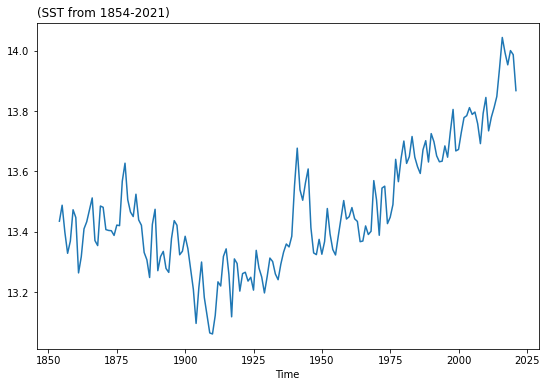

In [8]:
fig1 = plt.figure(figsize=(9, 6))
ax1 = fig1.subplots(1, 1)
ax1.set_xlabel('Time')
ax1.plot(data_sw['year'], data_sw)
ax1.set_title('(SST from 1854-2021)', loc='left')
# plt.savefig(r'D:\work\python\tests\(SST from 1854-2021)')
plt.show()

## 对中东太平洋海温进行EOF分解，画出第一模态

In [9]:
# ENSO指数,中东太平洋，计算20S~20N,170E-120W
data_cep = ds.loc['1979-01-01':'2021-12-01', 20:-20, 170:240]
data_cep = data_cep.groupby(data_cep.time.dt.year).mean('time')
data_cep

<xarray.DataArray 'sst' (year: 43, lat: 21, lon: 36)>
array([[[26.90232 , 26.815361, 26.718904, ..., 23.190912, 23.166069,
         23.237978],
        [27.19001 , 27.115759, 27.032671, ..., 24.461563, 24.484495,
         24.59651 ],
        [27.414293, 27.340172, 27.25061 , ..., 25.607008, 25.68563 ,
         25.823212],
        ...,
        [27.493525, 27.5261  , 27.590637, ..., 26.454168, 26.253359,
         26.051863],
        [26.680738, 26.710585, 26.79659 , ..., 26.161047, 25.99784 ,
         25.826271],
        [25.752283, 25.774809, 25.856543, ..., 25.6854  , 25.571587,
         25.44522 ]],

       [[26.994547, 26.911112, 26.82811 , ..., 23.282219, 23.300364,
         23.399643],
        [27.28305 , 27.21019 , 27.136873, ..., 24.449379, 24.53153 ,
         24.677345],
        [27.505907, 27.430939, 27.345339, ..., 25.561857, 25.702124,
         25.882927],
...
        [28.095938, 28.140253, 28.197754, ..., 26.19956 , 25.928812,
         25.658773],
        [27.244425, 27.266594, 27.371298, ..., 26.032547, 25.816801,
         25.572336],
        [26.27427 , 26.284506, 26.396349, ..., 25.628845, 25.443289,
         25.25058 ]],

       [[27.809946, 27.700043, 27.57016 , ..., 23.096552, 23.295134,
         23.560112],
        [28.007568, 27.890696, 27.759218, ..., 24.41401 , 24.62156 ,
         24.889992],
        [28.0738  , 27.956573, 27.833456, ..., 25.638937, 25.839699,
         26.073751],
        ...,
        [28.227571, 28.275656, 28.343164, ..., 25.7842  , 25.551863,
         25.31742 ],
        [27.440351, 27.488188, 27.59893 , ..., 25.58515 , 25.371248,
         25.154161],
        [26.481659, 26.533339, 26.654121, ..., 25.322409, 25.122023,
         24.914019]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20.0 18.0 16.0 14.0 12.0 ... -14.0 -16.0 -18.0 -20.0
  * lon      (lon) float32 170.0 172.0 174.0 176.0 ... 234.0 236.0 238.0 240.0
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [10]:
lon = data_cep['lon'].data
lat = data_cep['lat'].data

In [11]:
eofdata_cep = Eof(np.array(data_cep))
eof_time_cep = eofdata_cep.pcs(pcscaling=1, npcs=2)
# eof_vars_cep = eofdata_cep.eofs(eofscaling=0, neofs=2)
eof_space_cep = eofdata_cep.eofsAsCorrelation(neofs=2)
eof_s2_cep = eofdata_cep.varianceFraction(neigs=2)

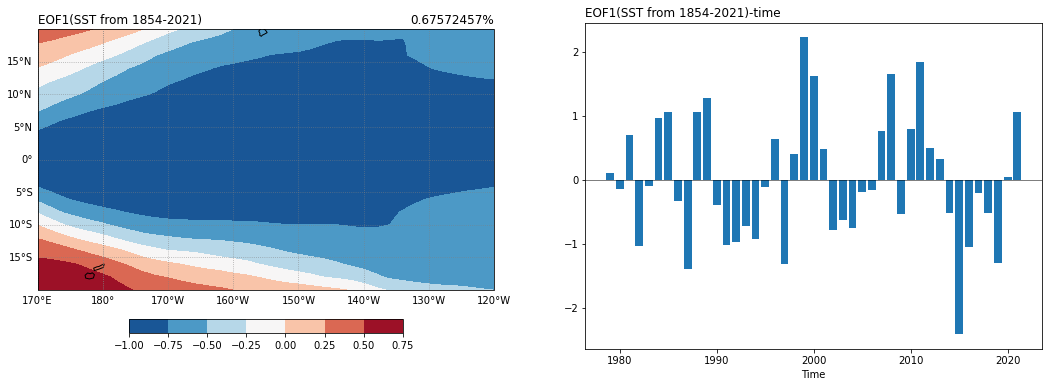

In [12]:
fig = plt.figure(figsize=(18, 6))

# 画第一个子图
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
# ax1 = fig.add_axes([0.1, 0.1, 0.45, 0.8],projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax1.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax1.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.7, 
              linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
# 画等值线
# line = ax1.contour(lon, lat, eof_space_cep[0, :, :], colors='k', linewidths=1, transform=ccrs.PlateCarree())
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.1f')
# 画填色图
shaded = ax1.contourf(lon, lat, eof_space_cep[0, :, :], cmap='RdBu_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.09, shrink=0.6, location='bottom')
ax1.set_title('EOF1(SST from 1854-2021)', loc='left')
ax1.set_title(str(eof_s2_cep[0])+'%', loc='right')

# 画第二个子图
ax2 = fig.add_subplot(1, 2, 2)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax2.set_xlabel('Time')
ax2.bar(data_cep['year'], eof_time_cep[:, 0])    # 使用柱状图
ax2.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax2.set_title('EOF1(SST from 1854-2021)-time', loc='left')
plt.savefig(r'E:\Work\Python\test13-14\EOF1(SST from 1854-2021)')

# ax3 = fig.add_axes([0.51, 0.1, 0.01, 0.8])
# plt.colorbar(shaded, cax=ax3, shrink=0.7)

plt.show()

## 对印度洋海温进行EOF分解，画出第一模态

In [13]:
# 印度洋全区一致模态, 20S~20N， 40-110E
data_ind = ds.loc['1979-01-01':'2021-12-01', 20:-20, 40:110]
data_ind = data_ind.groupby(data_ind.time.dt.year).mean('time')
data_ind

<xarray.DataArray 'sst' (year: 43, lat: 21, lon: 36)>
array([[[29.223848,       nan,       nan, ...,       nan, 26.147675,
         26.162111],
        [29.403452, 29.455896,       nan, ...,       nan, 26.692995,
         26.921509],
        [29.415743, 29.29763 ,       nan, ...,       nan,       nan,
         27.488428],
        ...,
        [27.176107, 27.397028, 27.557043, ..., 26.240992, 26.399061,
         26.606459],
        [26.925962, 27.176237, 27.304344, ..., 25.290728, 25.51983 ,
         25.814299],
        [26.57859 , 26.79393 , 26.932165, ..., 24.362885, 24.61196 ,
         24.956423]],

       [[29.408178,       nan,       nan, ...,       nan, 26.175238,
         26.177912],
        [29.585455, 29.643438,       nan, ...,       nan, 26.735168,
         26.916258],
        [29.572723, 29.455862,       nan, ...,       nan,       nan,
         27.497179],
...
        [27.43653 , 27.639963, 27.79112 , ..., 27.357279, 27.529   ,
         27.735014],
        [27.175627, 27.410414, 27.54257 , ..., 26.478622, 26.702993,
         26.97906 ],
        [26.785933, 27.008772, 27.152788, ..., 25.463194, 25.744751,
         26.097494]],

       [[29.671022,       nan,       nan, ...,       nan, 26.134422,
         26.230934],
        [29.810972, 29.81154 ,       nan, ...,       nan, 26.800062,
         27.078688],
        [29.74562 , 29.615568,       nan, ...,       nan,       nan,
         27.708307],
        ...,
        [27.301962, 27.48572 , 27.627365, ..., 27.121359, 27.28244 ,
         27.481995],
        [27.103369, 27.325663, 27.455292, ..., 26.205389, 26.44002 ,
         26.737558],
        [26.788315, 27.017805, 27.164854, ..., 25.189995, 25.49909 ,
         25.897964]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20.0 18.0 16.0 14.0 12.0 ... -14.0 -16.0 -18.0 -20.0
  * lon      (lon) float32 40.0 42.0 44.0 46.0 48.0 ... 104.0 106.0 108.0 110.0
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [14]:
lon = data_ind['lon'].data
lat = data_ind['lat'].data

In [15]:
eofdata_ind = Eof(np.array(data_ind))
eof_time_ind = eofdata_ind.pcs(pcscaling=1, npcs=2)
eof_space_ind = eofdata_ind.eofsAsCorrelation(neofs=2)
eof_s2_ind = eofdata_ind.varianceFraction(neigs=2)
len(eof_time_ind[:, 0])

43

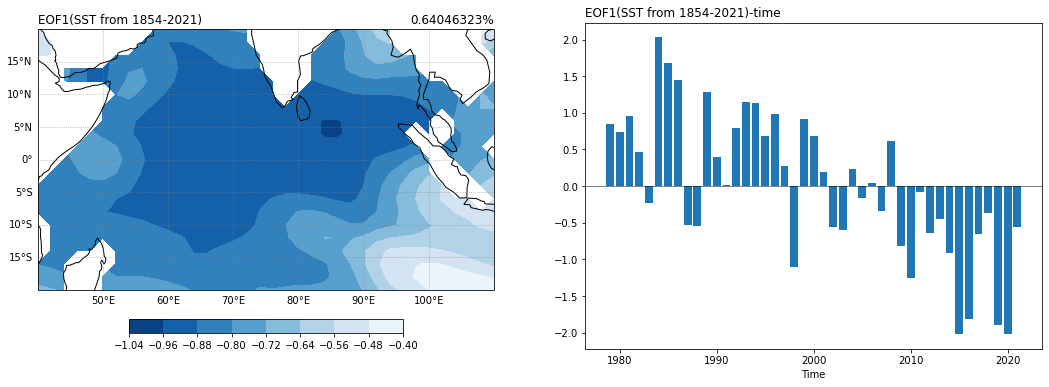

In [16]:
fig = plt.figure(figsize=(18, 6))

# 画第一个子图
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
# ax1 = fig.add_axes([0.1, 0.1, 0.45, 0.8],projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax1.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax1.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.7, 
              linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
# 画等值线
# line = ax1.contour(lon, lat, eof_space_ind[0, :, :], colors='k', linewidths=1, transform=ccrs.PlateCarree())
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.1f')
# 画填色图
shaded = ax1.contourf(lon, lat, eof_space_ind[0, :, :], cmap='Blues_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.09, shrink=0.6, location='bottom')
ax1.set_title('EOF1(SST from 1854-2021)', loc='left')
ax1.set_title(str(eof_s2_ind[0])+'%', loc='right')

# 画第二个子图
ax2 = fig.add_subplot(1, 2, 2)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax2.set_xlabel('Time')
ax2.bar(data_ind['year'], eof_time_ind[:, 0])    # 使用柱状图
ax2.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax2.set_title('EOF1(SST from 1854-2021)-time', loc='left')
plt.savefig(r'E:\Work\Python\test13-14\EOF1(SST from 1854-2021)')

# ax3 = fig.add_axes([0.51, 0.1, 0.01, 0.8])
# plt.colorbar(shaded, cax=ax3, shrink=0.7)

plt.show()

## 计算两个第一模态时间系数与我国气温的协方差、相关系数

### 太平洋

In [17]:
# 思路：计算全球气温协方差，之后截取我国部分
# 定义函数：
def relate_cov(ratio, temp, level):
    ratio_ave = np.mean(ratio)
    ratio_std = ratio - ratio_ave
    temp_std = temp.loc[:, level, :, :] - temp.loc[:, level, :, :].mean(dim='year')
    nume = np.sum(ratio_std*temp_std, axis=0)
    deno = (np.sqrt(np.sum(ratio_std**2)) * np.sqrt(np.sum(temp_std**2, axis=0)))
    r = nume/deno
    cov = nume/len(temp_std.year)
    return r, cov

In [18]:
dt_use = dt.groupby(dt.time.dt.year).mean('time')-273.15
dt_use = dt_use.loc[1979:2021, :, :, :]
dt_use

<xarray.DataArray 'air' (year: 43, level: 1, lat: 94, lon: 192)>
array([[[[-17.914963 , -17.847488 , -18.185822 , ..., -18.203323 ,
          -17.829987 , -17.871689 ],
         [-17.834991 , -17.769989 , -17.709991 , ..., -17.865005 ,
          -17.84999  , -17.842499 ],
         [-17.444138 , -17.302475 , -17.20668  , ..., -17.565842 ,
          -17.498337 , -17.44168  ],
         ...,
         [-40.99832  , -41.556686 , -42.095856 , ..., -39.249985 ,
          -39.845    , -40.429184 ],
         [-41.864166 , -42.234177 , -42.603317 , ..., -40.768326 ,
          -41.132523 , -41.496674 ],
         [-43.934982 , -44.095    , -44.25331  , ..., -43.47084  ,
          -43.624985 , -43.778305 ]]],


       [[[-16.387512 , -16.301697 , -16.716675 , ..., -16.695007 ,
          -16.236664 , -16.315857 ],
         [-16.28836  , -16.192505 , -16.100006 , ..., -16.184174 ,
          -16.20581  , -16.243347 ],
         [-16.112488 , -16.009186 , -15.942505 , ..., -16.07251  ,
...
          -38.25876  , -38.779037 ],
         [-39.902267 , -40.242325 , -40.586105 , ..., -38.84616  ,
          -39.198746 , -39.55272  ],
         [-41.633896 , -41.781326 , -41.92624  , ..., -41.18576  ,
          -41.334366 , -41.484055 ]]],


       [[[-12.707397 , -12.632935 , -12.632782 , ..., -13.00177  ,
          -13.006348 , -12.739685 ],
         [-12.560852 , -12.5433655, -12.538605 , ..., -12.621399 ,
          -12.612732 , -12.598389 ],
         [-12.261719 , -12.112427 , -11.975739 , ..., -12.539917 ,
          -12.375519 , -12.406067 ],
         ...,
         [-38.729767 , -39.231537 , -39.719833 , ..., -37.18283  ,
          -37.701813 , -38.217743 ],
         [-39.994522 , -40.31462  , -40.63492  , ..., -39.00212  ,
          -39.334244 , -39.666214 ],
         [-42.162247 , -42.30861  , -42.456894 , ..., -41.71791  ,
          -41.865753 , -42.013107 ]]]], dtype=float32)
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [19]:
r_po, cov_po = relate_cov(eof_time_cep[:, 0].reshape(len(eof_time_cep[:, 0]), 1, 1), dt_use, 2)
r_po

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[ 0.00675397,  0.02156255,  0.01745934, ...,  0.00530268,
         0.01773035,  0.0007703 ],
       [ 0.03373573,  0.02847413,  0.00585059, ...,  0.02685081,
         0.02905224,  0.03606539],
       [ 0.03755609,  0.02838304,  0.02375639, ...,  0.03371591,
         0.01879585,  0.02089372],
       ...,
       [ 0.03272872,  0.03659842,  0.03993735, ...,  0.01718666,
         0.02327267,  0.02867757],
       [-0.08792292, -0.09159767, -0.09477098, ..., -0.07840299,
        -0.08171179, -0.08465286],
       [-0.14272884, -0.14465068, -0.14636613, ..., -0.13561566,
        -0.13822423, -0.1410285 ]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [20]:
cov_po

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[ 0.01071623,  0.03498308,  0.0283371 , ...,  0.00831674,
         0.02795437,  0.00121807],
       [ 0.0541618 ,  0.04524497,  0.00924016, ...,  0.04194668,
         0.0455608 ,  0.05721404],
       [ 0.05972796,  0.04543746,  0.03810656, ...,  0.05126411,
         0.02923175,  0.03288627],
       ...,
       [ 0.02735133,  0.03112716,  0.03460833, ...,  0.01368011,
         0.01884353,  0.02358251],
       [-0.07300585, -0.07738069, -0.0814715 , ..., -0.06229371,
        -0.06584263, -0.06917793],
       [-0.12793624, -0.13031381, -0.13265085, ..., -0.11958894,
        -0.12256105, -0.12570257]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [21]:
lon = r_po['lon'].data
lat = r_po['lat'].data

In [22]:
print(r_po.max(), r_po.min())
print(cov_po.max(), cov_po.min())

<xarray.DataArray 'air' ()>
array(0.74083161)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-0.97046798)
Coordinates:
    level    float32 2.0
<xarray.DataArray 'air' ()>
array(0.74083096)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-0.80663824)
Coordinates:
    level    float32 2.0


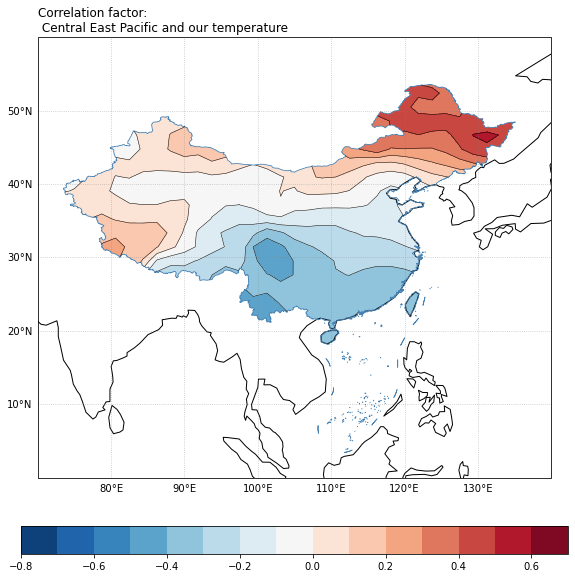

In [23]:
proj = ccrs.PlateCarree()
fig1 = plt.figure(figsize=(14, 10))
ax4 = fig1.subplots(1, 1, subplot_kw={'projection': proj})
# 海岸线
ax4.coastlines('110m')
ax4.set_extent([70,140,0,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax4.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
line = ax4.contour(lon, lat, r_po, levels=np.arange(-0.8, 0.8, 0.1), colors='k', linewidths=0.5, 
                   linestyles='solid', transform=ccrs.PlateCarree(central_longitude=180))
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax4.contourf(lon, lat, r_po, levels=np.arange(-0.8, 0.8, 0.1), cmap='RdBu_r', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig1.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax4.set_title('Correlation factor: \n Central East Pacific and our temperature', loc='left')
ax4.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax4.transData)
for collection in line.collections:
    collection.set_clip_path(path_clip,transform=ax4.transData)
plt.show()

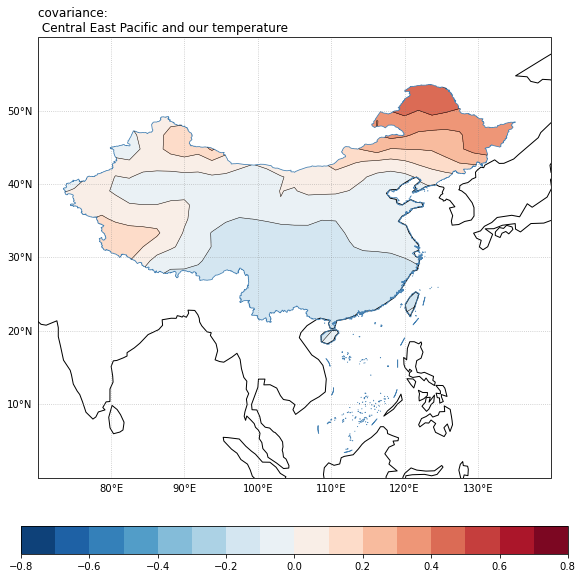

In [24]:
fig2 = plt.figure(figsize=(14, 10))
ax5 = fig2.subplots(1, 1, subplot_kw={'projection': proj})
# 海岸线
ax5.coastlines('110m')
ax5.set_extent([70,140,0,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax5.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
line = ax5.contour(lon, lat, cov_po, levels=np.arange(-0.8, 0.85, 0.1), colors='k', linewidths=0.5, 
                   linestyles='solid', transform=ccrs.PlateCarree(central_longitude=180))
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.1f')
shaded = ax5.contourf(lon, lat, cov_po, levels=np.arange(-0.8, 0.85, 0.1), cmap='RdBu_r', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig2.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax5.set_title('covariance: \n Central East Pacific and our temperature', loc='left')
ax5.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax5.transData)
for collection in line.collections:
    collection.set_clip_path(path_clip,transform=ax5.transData)
plt.show()

### 印度洋

In [25]:
r_id, cov_id = relate_cov(eof_time_ind[:, 0].reshape(len(eof_time_ind[:, 0]), 1, 1), dt_use, 2)
r_id

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-0.62361366, -0.6052294 , -0.6152811 , ..., -0.60880816,
        -0.59914714, -0.604451  ],
       [-0.5673759 , -0.5676906 , -0.5725101 , ..., -0.57293504,
        -0.57241744, -0.5646611 ],
       [-0.5300418 , -0.5131319 , -0.5073673 , ..., -0.5507617 ,
        -0.5392539 , -0.53092146],
       ...,
       [-0.46670732, -0.45608717, -0.44309068, ..., -0.479842  ,
        -0.47749576, -0.4738649 ],
       [-0.43656734, -0.42113551, -0.40521178, ..., -0.47779965,
        -0.46494517, -0.45090806],
       [-0.41799545, -0.4137821 , -0.4090242 , ..., -0.43301702,
        -0.42770427, -0.4230843 ]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [26]:
cov_id

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-0.98946095, -0.9819241 , -0.9986222 , ..., -0.9548567 ,
        -0.9446386 , -0.95581853],
       [-0.9109065 , -0.90205204, -0.90419734, ..., -0.8950463 ,
        -0.897686  , -0.8957768 ],
       [-0.8429609 , -0.8214554 , -0.813845  , ..., -0.83741766,
        -0.8386604 , -0.83565897],
       ...,
       [-0.39002636, -0.38790467, -0.3839671 , ..., -0.38194087,
        -0.3866211 , -0.3896747 ],
       [-0.3624989 , -0.3557706 , -0.3483472 , ..., -0.37962723,
        -0.37464857, -0.36847994],
       [-0.37467384, -0.37277052, -0.37069646, ..., -0.3818441 ,
        -0.37923804, -0.37710664]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [27]:
print(r_id.max(), r_id.min())
print(cov_id.max(), cov_id.min())

<xarray.DataArray 'air' ()>
array(0.62720317)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-0.91159379)
Coordinates:
    level    float32 2.0
<xarray.DataArray 'air' ()>
array(1.52985609)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-1.77109647)
Coordinates:
    level    float32 2.0


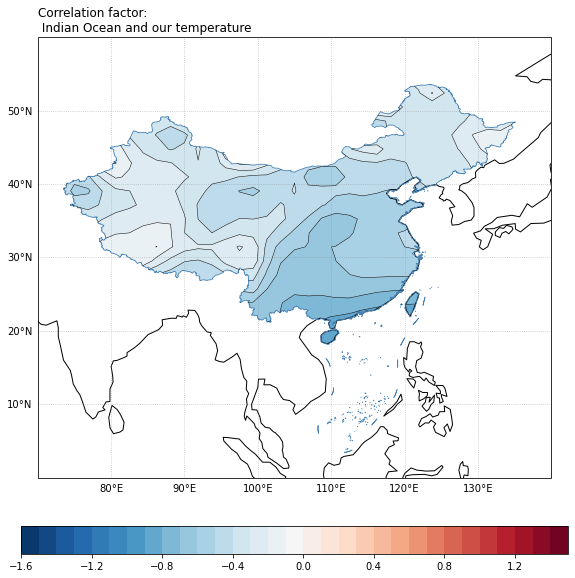

In [28]:
fig3 = plt.figure(figsize=(14, 10))
ax6 = fig3.subplots(1, 1, subplot_kw={'projection': proj})
# 海岸线
ax6.coastlines('110m')
ax6.set_extent([70,140,0,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax6.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
line = ax6.contour(lon, lat, r_id, levels=np.arange(-1.6, 1.6, 0.1), colors='k', linewidths=0.5, 
                   linestyles='solid', transform=ccrs.PlateCarree(central_longitude=180))
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.1f')
shaded = ax6.contourf(lon, lat, r_id, levels=np.arange(-1.6, 1.6, 0.1), cmap='RdBu_r', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig3.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax6.set_title('Correlation factor: \n Indian Ocean and our temperature', loc='left')
ax6.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax6.transData)
for collection in line.collections:
    collection.set_clip_path(path_clip,transform=ax6.transData)
plt.show()

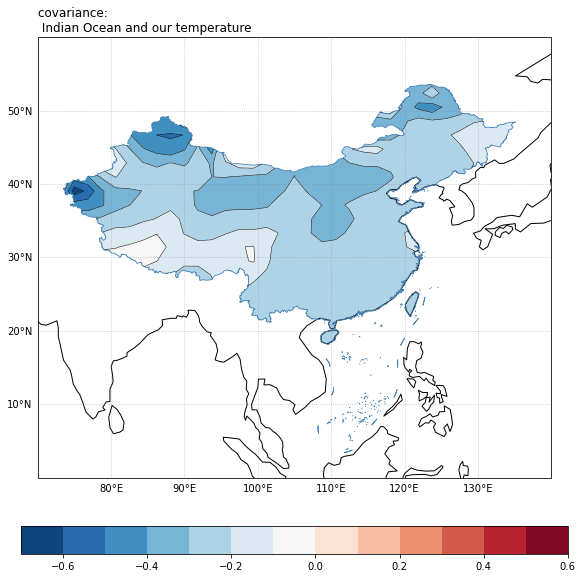

In [29]:
fig4 = plt.figure(figsize=(14, 10))
ax7 = fig4.subplots(1, 1, subplot_kw={'projection': proj})
# 海岸线
ax7.coastlines('110m')
ax7.set_extent([70,140,0,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax7.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
line = ax7.contour(lon, lat, cov_id, levels=np.arange(-0.7, 0.7, 0.1), colors='k', linewidths=0.5, 
                   linestyles='solid', transform=ccrs.PlateCarree(central_longitude=180))
# ax1.clabel(line, inline=True, fontsize=10, fmt='%.1f')
shaded = ax7.contourf(lon, lat, cov_id, levels=np.arange(-0.7, 0.7, 0.1), cmap='RdBu_r', 
                      transform=ccrs.PlateCarree(central_longitude=180))
cb=fig4.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax7.set_title('covariance: \n Indian Ocean and our temperature', loc='left')
ax7.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax7.transData)
for collection in line.collections:
    collection.set_clip_path(path_clip,transform=ax7.transData)
plt.show()

## 用印度洋海温和中东太平洋海温与我国气温进行SVD分析

In [30]:
data_cep_s = ds.loc['1979-01-01':'2021-12-01', 30:-30, 140:290]
data_ind_s = ds.loc['1979-01-01':'2021-12-01', 20:-20, 40:110]
dt_use_s = dt.loc['1979-01-01':'2021-12-01', 2, :, :]
# data_cep.rename({'year':'time'})
# data_ind.rename({'year':'time'})
del dt_use_s['level']
dt_use_s

<xarray.DataArray 'air' (time: 516, lat: 94, lon: 192)>
[9312768 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

In [31]:
data_cep_s

<xarray.DataArray 'sst' (time: 516, lat: 31, lon: 76)>
[1215696 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 30.0 28.0 26.0 24.0 22.0 ... -24.0 -26.0 -28.0 -30.0
  * lon      (lon) float32 140.0 142.0 144.0 146.0 ... 284.0 286.0 288.0 290.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

### 中东太平洋海温

In [32]:
data_cep_s['time'] = dt_use_s['time']
svd_p = xMCA(data_cep_s, dt_use_s)
svd_p.solver()
lp_p, rp_p = svd_p.patterns(n=2)
le_p, re_p = svd_p.expansionCoefs(n=2)
frac_p = svd_p.covFracs(n=2)
print(lp_p.max(), lp_p.min())
lp_p

<xarray.DataArray 'leftPattern' ()>
array(2.71807408) <xarray.DataArray 'leftPattern' ()>
array(-5.43669415)


<xarray.DataArray 'leftPattern' (n: 2, lat: 31, lon: 76)>
array([[[-3.151369  , -3.1261878 , -3.1260395 , ..., -2.820431  ,
         -2.9350865 , -2.9161975 ],
        [-3.026261  , -2.9731343 , -2.9590049 , ..., -2.5181866 ,
         -2.5384376 , -2.48869   ],
        [-2.7717495 , -2.6736238 , -2.6129713 , ..., -2.0636306 ,
         -2.010762  , -1.9858359 ],
        ...,
        [        nan,         nan,         nan, ...,  1.6926562 ,
          2.0832336 ,  2.3475022 ],
        [        nan,         nan,         nan, ...,  1.6118743 ,
          1.8815714 ,         nan],
        [        nan,         nan,         nan, ...,  1.6199645 ,
          1.7641954 ,         nan]],

       [[ 0.21450603,  0.34501362,  0.45697275, ..., -0.25489092,
         -0.18498959, -0.09424669],
        [ 0.09733933,  0.18437152,  0.25009698, ..., -0.14533436,
         -0.11304458, -0.0741597 ],
        [-0.13417985, -0.05856436,  0.00776204, ..., -0.04539401,
          0.00808463,  0.01365145],
        ...,
        [        nan,         nan,         nan, ..., -0.19422077,
          0.15170331,  0.40622288],
        [        nan,         nan,         nan, ..., -0.16258587,
          0.07968108,         nan],
        [        nan,         nan,         nan, ..., -0.08728352,
          0.07561127,         nan]]], dtype=float32)
Coordinates:
  * n        (n) int32 0 1
  * lat      (lat) float64 30.0 28.0 26.0 24.0 22.0 ... -24.0 -26.0 -28.0 -30.0
  * lon      (lon) float64 140.0 142.0 144.0 146.0 ... 284.0 286.0 288.0 290.0
Attributes:
    long_name:  Signular Vectors for sst.

In [33]:
lep_year = le_p.groupby(le_p.time.dt.year).mean(dim='time')
rep_year = re_p.groupby(re_p.time.dt.year).mean(dim='time')
lep_year

<xarray.DataArray 'leftExpansionCoefs' (n: 2, year: 43)>
array([[ 0.05384313,  0.04516573,  0.02146815,  0.02603343,  0.09189857,
         0.03790491,  0.00530821, -0.00724917,  0.01042125,  0.01691134,
         0.01735201, -0.03638846, -0.05600245,  0.0434963 , -0.01199352,
        -0.05885984,  0.00750108,  0.03386066,  0.07349961,  0.09500655,
         0.02528491,  0.00443834,  0.01345311,  0.04186768, -0.00798292,
        -0.01135069, -0.00503386,  0.05350664, -0.04007911,  0.05794925,
         0.01947814,  0.05321442,  0.05325075,  0.04493828, -0.01382924,
        -0.08361445, -0.13839872, -0.02730837, -0.04447948, -0.08367685,
        -0.14165166, -0.12668018, -0.05247321],
       [-0.16579922, -0.05877455,  0.25970665, -0.6232716 , -0.77951735,
         0.21153025,  0.4343984 ,  0.05399217, -0.6289614 ,  0.5766541 ,
         0.34599748,  0.12654607, -0.20918186, -0.24658304, -0.2726228 ,
        -0.09347131,  0.20068061,  0.42794272, -0.8878483 , -0.50128084,
         0.40140474,  0.28859827,  0.15836892, -0.16935231,  0.03049675,
        -0.03649723,  0.09805012, -0.1969267 ,  0.38852605,  0.10628531,
        -0.21292102,  0.4377993 ,  0.40359926, -0.21638252,  0.25966617,
         0.03967457, -0.62090605, -0.35497698,  0.05855617,  0.19365168,
        -0.05875893,  0.35280523,  0.47910285]], dtype=float32)
Coordinates:
  * n        (n) int32 0 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [34]:
lon_pl = lp_p['lon'].data
lat_pl = lp_p['lat'].data
lon_pr = rp_p['lon'].data
lat_pr = rp_p['lat'].data

Text(0.5, 1.0, '1st time series of right')

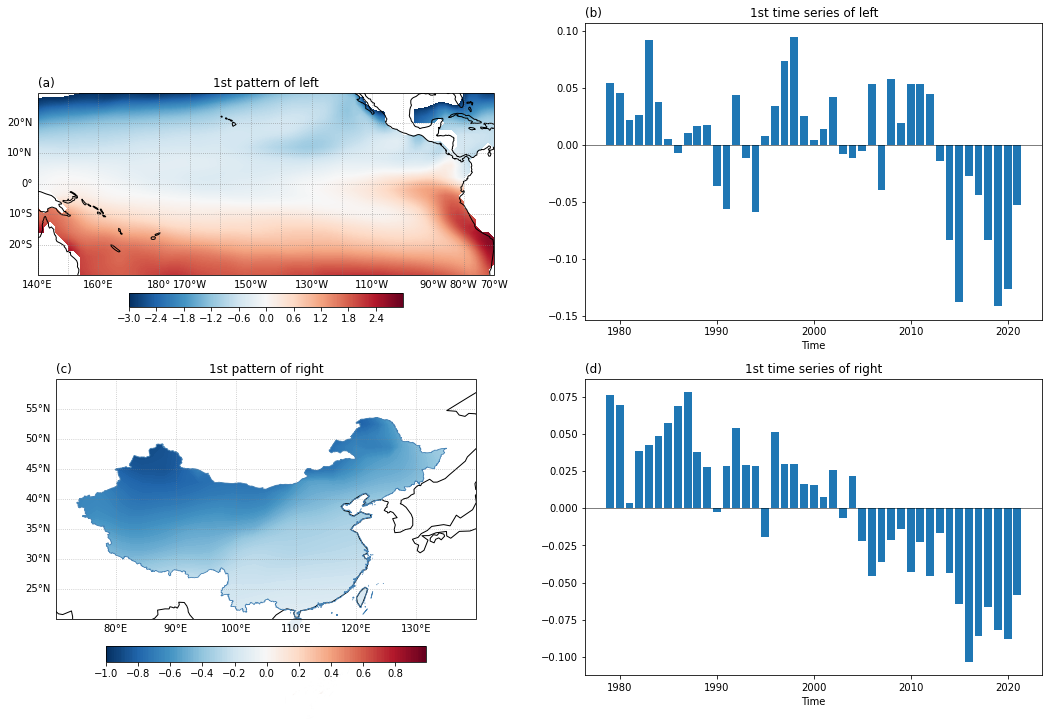

In [35]:
fig = plt.figure(figsize=(18, 12)) 

# 画第一个子图
ax8 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
# ax1 = fig.add_axes([0.1, 0.1, 0.45, 0.8],projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax8.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax8.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.7, 
              linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
# 画填色图
shaded = ax8.contourf(lon_pl, lat_pl, lp_p[0], levels=np.arange(-3, 3, 0.01), cmap='RdBu_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.06, fraction=0.09, shrink=0.6, location='bottom')
ax8.set_title('(a)', loc='left')
ax8.set_title('1st pattern of left')

# 画第二个子图
ax9 = fig.add_subplot(2, 2, 2)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax9.set_xlabel('Time')
ax9.bar(lep_year['year'].data, lep_year[0, :].data)    # 使用柱状图
ax9.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax9.set_title('(b)', loc='left')
ax9.set_title('1st time series of left')

# 画第三个子图
ax10 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
# 海岸线
ax10.coastlines('110m')
ax10.set_extent([70,140,20,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax10.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax10.contourf(lon_pr, lat_pr, rp_p[0], levels=np.arange(-1, 1, 0.01), cmap='RdBu_r', 
                       transform=ccrs.PlateCarree(central_longitude=180))
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax10.set_title('(c)', loc='left')
ax10.set_title('1st pattern of right')
ax10.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax10.transData)
    
# 画第四个子图
ax11 = fig.add_subplot(2, 2, 4)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax11.set_xlabel('Time')
ax11.bar(rep_year['year'].data, rep_year[0, :].data)    # 使用柱状图
ax11.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax11.set_title('(d)', loc='left')
ax11.set_title('1st time series of right')

### 印度洋海温

In [36]:
data_ind_s['time'] = dt_use_s['time']
svd_i = xMCA(data_ind_s, dt_use_s)
svd_i.solver()
lp_i, rp_i = svd_i.patterns(n=2)
le_i, re_i = svd_i.expansionCoefs(n=2)
frac_i = svd_i.covFracs(n=2)
print(lp_i.max(), lp_i.min())
rp_i

<xarray.DataArray 'leftPattern' ()>
array(1.73054063) <xarray.DataArray 'leftPattern' ()>
array(-3.33685899)


<xarray.DataArray 'rightPattern' (n: 2, lat: 94, lon: 192)>
array([[[-0.26581207, -0.26536506, -0.26549524, ..., -0.2658056 ,
         -0.2655917 , -0.2657415 ],
        [-0.2612212 , -0.26077348, -0.26033226, ..., -0.26221928,
         -0.26176643, -0.26108283],
        [-0.2563201 , -0.25564116, -0.25458726, ..., -0.25969124,
         -0.25872856, -0.257579  ],
        ...,
        [ 0.16888283,  0.1696767 ,  0.17039955, ...,  0.16608734,
          0.16708541,  0.16801451],
        [ 0.16861711,  0.16933651,  0.1700364 , ...,  0.16639341,
          0.16714655,  0.16789088],
        [ 0.1685062 ,  0.16886458,  0.16924252, ...,  0.16743162,
          0.1677806 ,  0.1681422 ]],

       [[ 0.03231207,  0.03462158,  0.0338871 , ...,  0.03510363,
          0.03545612,  0.03338515],
        [ 0.03642324,  0.0384093 ,  0.03911998, ...,  0.0351885 ,
          0.03587667,  0.03583589],
        [ 0.04034305,  0.04382096,  0.04567374, ...,  0.03975125,
          0.03867256,  0.03949144],
        ...,
        [ 0.21011324,  0.21485995,  0.2197466 , ...,  0.19702958,
          0.20134816,  0.20565201],
        [ 0.22783916,  0.23123345,  0.234816  , ...,  0.2180685 ,
          0.22118048,  0.22443771],
        [ 0.23761205,  0.23901916,  0.24037498, ...,  0.2336924 ,
          0.23498204,  0.23627341]]], dtype=float32)
Coordinates:
  * n        (n) int32 0 1
  * lat      (lat) float64 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    long_name:  Signular Vectors for air.

In [37]:
lei_year = le_i.groupby(le_i.time.dt.year).mean(dim='time')
rei_year = re_i.groupby(re_i.time.dt.year).mean(dim='time')
lei_year

<xarray.DataArray 'leftExpansionCoefs' (n: 2, year: 43)>
array([[-0.07954123, -0.12796958, -0.07851905, -0.02761596,  0.08402842,
        -0.10715231, -0.08442206, -0.06467225,  0.02133686,  0.0290715 ,
        -0.08533156, -0.06047278,  0.06333583, -0.01018721, -0.15218623,
        -0.05031796, -0.04145956, -0.03843094, -0.05141206, -0.06902549,
        -0.1277014 , -0.09574917, -0.10526218,  0.01392342,  0.0034114 ,
        -0.00561717,  0.01886587, -0.07138511,  0.03647029, -0.05705816,
         0.10781621,  0.0406156 ,  0.11074831,  0.12545657,  0.08933248,
         0.16469659,  0.16218364,  0.08627286,  0.00890781,  0.02026824,
         0.22450365,  0.17191811,  0.00832352],
       [ 0.27204537,  0.20660405,  0.33521077,  0.11486445, -0.08185371,
         0.6607265 ,  0.54854876,  0.4981196 , -0.17276476, -0.20377588,
         0.39835086,  0.13124532,  0.05381787,  0.28184262,  0.3750985 ,
         0.401189  ,  0.21912497,  0.35074964,  0.04709767, -0.45700935,
         0.26833016,  0.21409445,  0.07416011, -0.17503907, -0.18443851,
         0.12214452, -0.01407   ,  0.01357462, -0.11444142,  0.21562241,
        -0.27274057, -0.44900265, -0.01491482, -0.1807584 , -0.11725602,
        -0.26284766, -0.67377776, -0.5893653 , -0.25485945, -0.13501741,
        -0.59828293, -0.6459108 , -0.20443046]], dtype=float32)
Coordinates:
  * n        (n) int32 0 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [38]:
lon_il = lp_i['lon'].data
lat_il = lp_i['lat'].data
lon_ir = rp_i['lon'].data
lat_ir = rp_i['lat'].data

Text(0.5, 1.0, '1st time series of right')

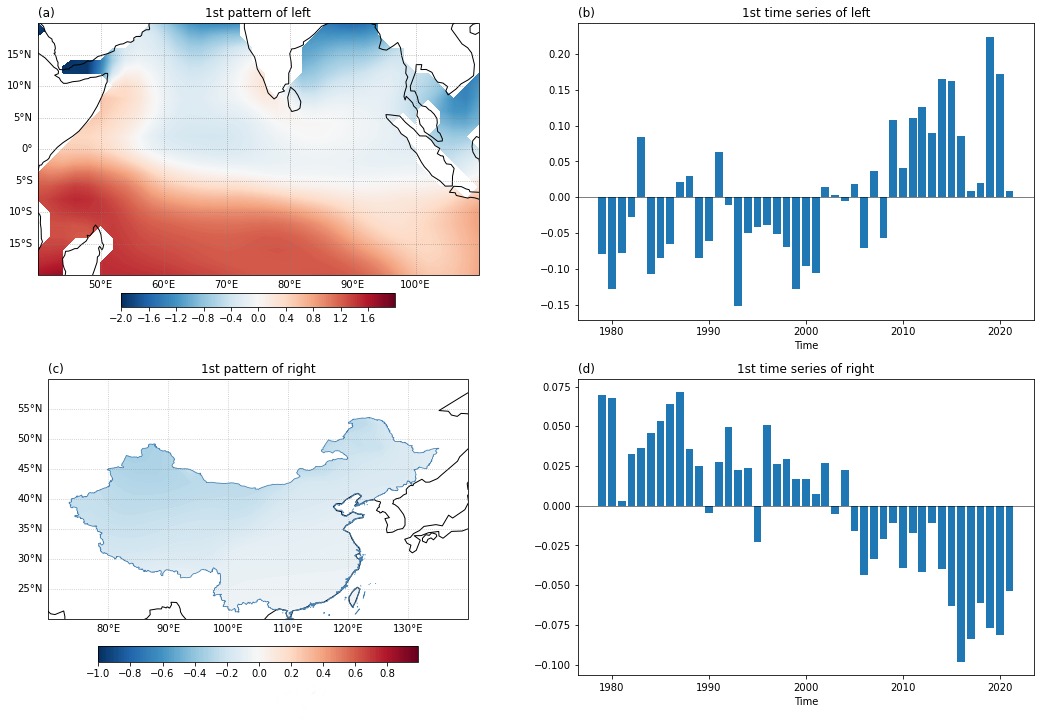

In [39]:
fig = plt.figure(figsize=(18, 12)) 

# 画第一个子图
ax12 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
# ax1 = fig.add_axes([0.1, 0.1, 0.45, 0.8],projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax12.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax12.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.7, 
               linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
# 画填色图
shaded = ax12.contourf(lon_il, lat_il, lp_i[0], levels=np.arange(-2, 2, 0.01), cmap='RdBu_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.06, fraction=0.09, shrink=0.6, location='bottom')
ax12.set_title('(a)', loc='left')
ax12.set_title('1st pattern of left')

# 画第二个子图
ax13 = fig.add_subplot(2, 2, 2)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax13.set_xlabel('Time')
ax13.bar(lei_year['year'].data, lei_year[0, :].data)    # 使用柱状图
ax13.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax13.set_title('(b)', loc='left')
ax13.set_title('1st time series of left')

# 画第三个子图
ax14 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
# 海岸线
ax14.coastlines('110m')
ax14.set_extent([70,140,20,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax14.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax14.contourf(lon_ir, lat_ir, rp_i[0], levels=np.arange(-1, 1, 0.01), cmap='RdBu_r', 
                       transform=ccrs.PlateCarree(central_longitude=180))
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax14.set_title('(c)', loc='left')
ax14.set_title('1st pattern of right')
ax14.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax14.transData)
    
# 画第四个子图
ax15 = fig.add_subplot(2, 2, 4)
# ax2=fig.add_axes([0.6, 0.1, 0.35, 0.8])
ax15.set_xlabel('Time')
ax15.bar(rei_year['year'].data, rei_year[0, :].data)    # 使用柱状图
ax15.axhline(y=0, linestyle='-', color='k', linewidth=0.5)
ax15.set_title('(d)', loc='left')
ax15.set_title('1st time series of right')

## 利用两个第一模态的时间系数回归中国夏季气温

In [40]:
# 创建回归函数
def b_ratio(x, y, level):
    y = y.loc[:, level, :, :]
    x_ave = np.mean(x)
    y_ave = y.mean(dim='year')
    nume = np.sum(x*y, axis=0)-(len(y.year))*(x_ave*y_ave)
    deno = (np.sum(x**2)) - (len(y.year))*(x_ave**2)
    r = nume/deno
    return r

In [41]:
# lei_year[0, :].mean(dim='year')

In [42]:
dt_use_r = dt.loc[dt.time.dt.month.isin([6,7,8])]
dt_use_r = dt_use_r.groupby(dt_use_r.time.dt.year).mean('time')
dt_use_r = dt_use_r.loc[1979:2021, :, :, :]-273.15
dt_use_r

<xarray.DataArray 'air' (year: 43, level: 1, lat: 94, lon: 192)>
array([[[[-1.55664062e+00, -1.51666260e+00, -1.55999756e+00, ...,
          -1.58334351e+00, -1.52667236e+00, -1.54333496e+00],
         [-1.66665649e+00, -1.64001465e+00, -1.61334229e+00, ...,
          -1.70333862e+00, -1.69332886e+00, -1.67666626e+00],
         [-1.58663940e+00, -1.53668213e+00, -1.50335693e+00, ...,
          -1.58666992e+00, -1.57666016e+00, -1.57000732e+00],
         ...,
         [-5.17666779e+01, -5.23866730e+01, -5.29966583e+01, ...,
          -4.99033356e+01, -5.05299988e+01, -5.11499939e+01],
         [-5.26466522e+01, -5.30766754e+01, -5.35133362e+01, ...,
          -5.13633270e+01, -5.17900085e+01, -5.22166595e+01],
         [-5.48799896e+01, -5.50733337e+01, -5.52733307e+01, ...,
          -5.42966614e+01, -5.44900055e+01, -5.46833191e+01]]],


       [[[-2.67669678e+00, -2.63000488e+00, -2.76666260e+00, ...,
          -2.78997803e+00, -2.61334229e+00, -2.64999390e+00],
         [-2.40664673e+00, -2.37332153e+00, -2.33663940e+00, ...,
          -2.37667847e+00, -2.38333130e+00, -2.39001465e+00],
         [-2.02999878e+00, -2.01000977e+00, -1.99331665e+00, ...,
...
         [-4.79583435e+01, -4.83657532e+01, -4.87690887e+01, ...,
          -4.67042389e+01, -4.71259003e+01, -4.75449524e+01],
         [-4.93410492e+01, -4.95191956e+01, -4.96949768e+01, ...,
          -4.87965546e+01, -4.89797058e+01, -4.91609039e+01]]],


       [[[ 1.18652344e-01,  1.71813965e-01,  1.77185059e-01, ...,
          -2.07214355e-02, -1.50756836e-02,  9.35668945e-02],
         [ 2.00195312e-02,  3.51562500e-02,  3.95812988e-02, ...,
          -3.80249023e-02, -2.55126953e-02, -8.30078125e-03],
         [ 1.89208984e-02,  1.79443359e-02,  4.03137207e-02, ...,
          -4.35180664e-02,  8.33129883e-03, -3.99780273e-03],
         ...,
         [-4.79572449e+01, -4.85799866e+01, -4.91715240e+01, ...,
          -4.60982819e+01, -4.67070465e+01, -4.73285828e+01],
         [-4.92041931e+01, -4.95531158e+01, -4.99061584e+01, ...,
          -4.80647736e+01, -4.84512634e+01, -4.88326263e+01],
         [-5.12352753e+01, -5.14048615e+01, -5.15702820e+01, ...,
          -5.07220154e+01, -5.08936462e+01, -5.10634460e+01]]]],
      dtype=float32)
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020 2021

In [43]:
# 使用eof和全球气温计算
r_p = b_ratio(eof_time_cep[:, 0].reshape(len(eof_time_cep[:, 0]), 1, 1), dt_use_r, 2)
r_i = b_ratio(eof_time_ind[:, 0].reshape(len(eof_time_ind[:, 0]), 1, 1), dt_use_r, 2)
print(r_p.max(), r_p.min())
print(r_i.max(), r_i.min())
r_p

<xarray.DataArray 'air' ()>
array(1.50974703)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-1.57917833)
Coordinates:
    level    float32 2.0
<xarray.DataArray 'air' ()>
array(1.75479412)
Coordinates:
    level    float32 2.0 <xarray.DataArray 'air' ()>
array(-2.6287601)
Coordinates:
    level    float32 2.0


<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-0.0542246 , -0.03499246, -0.0399697 , ..., -0.04366961,
        -0.04120366, -0.04481439],
       [-0.01897577, -0.00583002, -0.01602621, ..., -0.0222708 ,
        -0.01970938, -0.01803363],
       [ 0.0244261 ,  0.03075232,  0.02576393, ..., -0.00742263,
        -0.01398966,  0.00391168],
       ...,
       [ 0.43734393,  0.43986207,  0.4429884 , ...,  0.42358285,
         0.42952996,  0.43412924],
       [ 0.37380597,  0.37218678,  0.37147087, ...,  0.37753838,
         0.37617612,  0.37552306],
       [ 0.34252566,  0.3423323 ,  0.3419357 , ...,  0.34573248,
         0.34418836,  0.34253034]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [44]:
lon_r = r_p['lon'].data
lat_r = r_p['lat'].data

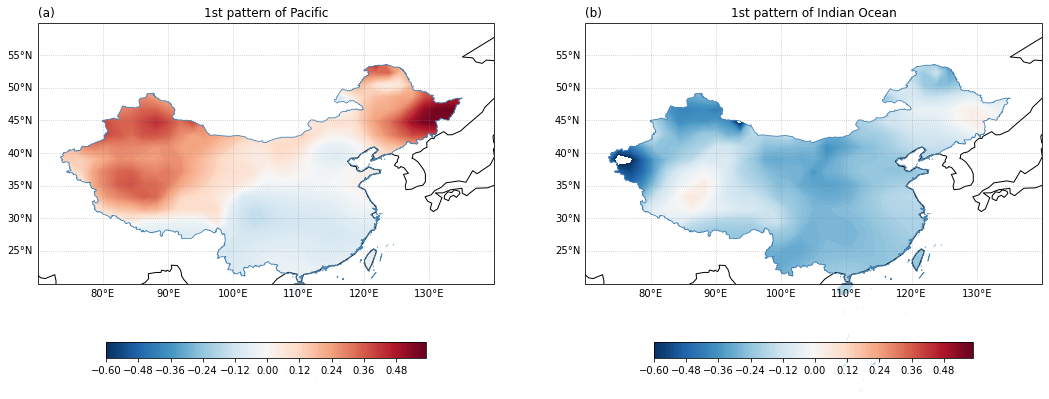

In [45]:
fig = plt.figure(figsize=(18, 12))
ax15 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
# 海岸线
ax15.coastlines('110m')
ax15.set_extent([70,140,20,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax15.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax15.contourf(lon_r, lat_r, r_p, levels=np.arange(-0.6, 0.6, 0.01), cmap='RdBu_r', 
                       transform=ccrs.PlateCarree(central_longitude=180))
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom')
ax15.set_title('(a)', loc='left')
ax15.set_title('1st pattern of Pacific')
ax15.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax15.transData)

#
ax16 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
# 海岸线
ax16.coastlines('110m')
ax16.set_extent([70,140,20,55])
# 标注坐标轴
majorticks = MultipleLocator(10)
ax16.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax16.contourf(lon_r, lat_r, r_i, levels=np.arange(-0.6, 0.6, 0.01), cmap='RdBu_r', 
                       transform=ccrs.PlateCarree(central_longitude=180))
cb=fig.colorbar(shaded, extendrect='True', pad=0.09, fraction=0.1, shrink=0.7, location='bottom')
ax16.set_title('(b)', loc='left')
ax16.set_title('1st pattern of Indian Ocean')
ax16.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
# 生成裁剪路径
path_clip =Path.make_compound_path(*geos_to_path(shp['geometry'].to_list()))
# 将裁剪路径应用到图层
for collection in shaded.collections:
    collection.set_clip_path(path_clip,transform=ax16.transData)